In [42]:
# 시계열분석
# Series이 시계열 데이터를 저장하는 포멧 ( 기본 ) + 인덱스 DateTimeIndex
# Index는 행이름 = DateTimeIndex, columns 열이름
# 데이터프레임이 시계열 다루는 것을 기본으로 생성
# 시계열 데이터는 금융, 경제, 생태학, 신경과학, 물리학 등에 사용하는 데이터 포멧
# 시간 - core : datetime64형태로 저장
# pandas에서는 timestamp로 저장
# 나노초를 기준으로 함
# DateTimeIndex를 생성하는 방법은
    # to_datetime : 기존에 있는 데이터를 시간 인덱스 생성
    # date_range : 범위값으로 생성
# 시계열 데이터의 표현은 series에 index가 DateTimeIndex인 것
# 시간을 표현하는 기본 타입은 time, date, datetime, timedelta

# numpy datetime64 자료형으로 timestamp로 저장 정밀도는 나노초를 갖는다. (1970.01.01 을 기점 - timestamp) 
        # => DatetimeIndex(행 이름)로 생성해서 사용

# 시간
    # UTC : Coordinated Universal Time 국제 표준 시 = 표준
    # GMT는 Greenwich Mean Time
    # 시간을 문자열로 처리하기 위해 iso8601( 시간을 문자로 표현하는 표준 )을 사용
# shift( 비교를 위해서나 처리를 위해서 ), resample
# rolling (이동평균법 : Moving Average를 사용하기 위한 절차)
    # 고주파를 저주파로 변경(일정한 기간에 평균값을 내기 위해, 데이터의 변화를 파악하기 위해서)

In [43]:
import numpy as np
import pandas as pd

import pytz
print(pytz.common_timezones[-5:]) # timezone
tz=pytz.timezone('US/Eastern')
print(tz)
# T : 분 W : 주별, H : 시간 
rng=pd.date_range('3/9/2012 9:30', periods=6, freq='Q-DEC') 
#  periods : 갯수
# 'W' - 1주일씩 건너띔 'W-MON' : 월요일 중심, 주 단위 씩 증가 
# 'M' :  마지막날을 기준으로 출력 'MS' : month start (각 달의 첫 날을 기준으로 출력)
# 'BM' : 휴일이 아닌 마지막 주말을 기준으로 출력
# 'WOM-2THU' : 각 달의 두 번째 목요일을 기준으로 출력
# 'Q-JAN' : 분기별 첫 달의 마지막 날을 기준으로 출력
# 'Q-DEC' : 분기의 마지막 달을 기준으로 출력
ts=pd.Series(np.random.randn(len(rng)), index=rng)
print(ts.index)
print(pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC'))
ts_utc=ts.tz_localize('UTC')
print(ts_utc.index)
print(ts_utc.tz_convert('US/Eastern'))
print(ts.index.tz_localize('Asia/Seoul'))

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']
US/Eastern
DatetimeIndex(['2012-03-31 09:30:00', '2012-06-30 09:30:00',
               '2012-09-30 09:30:00', '2012-12-31 09:30:00',
               '2013-03-31 09:30:00', '2013-06-30 09:30:00'],
              dtype='datetime64[ns]', freq='Q-DEC')
DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')
DatetimeIndex(['2012-03-31 09:30:00+00:00', '2012-06-30 09:30:00+00:00',
               '2012-09-30 09:30:00+00:00', '2012-12-31 09:30:00+00:00',
               '2013-03-31 09:30:00+00:00', '2013-06-30 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='Q

In [44]:
# A: annual 년단위
# 회계기간을 지정하는 방법으로 사용
p=pd.Period('2012', freq='A-JUN')
print(p.asfreq('M', how='start'))
print(p.asfreq('M', how='end'))
print(p.asfreq('D', how='start'))
print(p.asfreq('D', how='end'))
print(p)
print(p+5)
print(p-2)
r=pd.Period('2014', freq='A-DEC')
print(r)
rng=pd.period_range('1/1/2012', '6/12/2012',freq='M')
print("범위값", rng)
res=pd.Series(np.random.randn(6), index=rng)
values=['20130301', '20130201', '20130101']
index=pd.PeriodIndex(values, freq='Q-DEC')
print(index)

2011-07
2012-06
2011-07-01
2012-06-30
2012
2017
2010
2014
범위값 PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06'], dtype='period[M]', freq='M')
PeriodIndex(['2013Q1', '2013Q1', '2013Q1'], dtype='period[Q-DEC]', freq='Q-DEC')


In [45]:
from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day)
delta = datetime(2017, 11, 29) - datetime(2017, 1, 11, 0, 0)
print("timedelta 시간차값", delta)
print(delta.days)

2018-07-27 15:14:08.350735
2018 7 27
timedelta 시간차값 322 days, 0:00:00
322


In [46]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [47]:
stamp = datetime(2018,11,10)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2018-11-10 00:00:00
2018-11-10


In [48]:
from pandas import Series, DataFrame
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.725761
2011-01-05   -1.982842
2011-01-07    1.625110
2011-01-08    0.235278
2011-01-10    0.505683
2011-01-12   -2.544363
dtype: float64

In [49]:
print(type(ts))
print(ts.index)
print(ts.index.dtype) # M8[ns] : 'datetime64'형을 의미함
print(ts.index[0]) # 인덱스가 timestamp 임

<class 'pandas.core.series.Series'>
DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)
datetime64[ns]
2011-01-02 00:00:00


In [50]:
ts['1/10/2011']

0.5056831393439265

In [51]:
ts['20110110']

0.5056831393439265

In [52]:
longer_ts = Series(np.random.randn(1000),
                  index=pd.date_range('1/1/2000', periods=1000)) # 3년 정도의 데이터
longer_ts

2000-01-01   -0.945722
2000-01-02   -0.780589
2000-01-03    0.072306
2000-01-04   -0.114908
2000-01-05    2.455789
2000-01-06    0.133270
2000-01-07   -0.206929
2000-01-08   -0.654289
2000-01-09    0.518467
2000-01-10   -0.437928
2000-01-11   -1.468531
2000-01-12   -0.770961
2000-01-13    0.184047
2000-01-14    1.041850
2000-01-15    1.096716
2000-01-16    0.050750
2000-01-17    0.831336
2000-01-18    1.382552
2000-01-19   -1.385646
2000-01-20    0.687430
2000-01-21    1.311249
2000-01-22   -1.128465
2000-01-23    0.798968
2000-01-24   -0.295077
2000-01-25   -0.631208
2000-01-26    0.393943
2000-01-27    1.051413
2000-01-28    0.001848
2000-01-29   -1.214035
2000-01-30    0.766686
                ...   
2002-08-28    0.129523
2002-08-29    0.215814
2002-08-30    1.529279
2002-08-31   -0.072739
2002-09-01    2.612847
2002-09-02    0.052567
2002-09-03   -0.112518
2002-09-04    0.371934
2002-09-05   -0.383101
2002-09-06    2.475516
2002-09-07    0.613496
2002-09-08   -0.761118
2002-09-09 

In [53]:
longer_ts['2001']

2001-01-01   -1.288902
2001-01-02   -0.527145
2001-01-03    0.081650
2001-01-04   -0.165564
2001-01-05    0.511995
2001-01-06   -0.013791
2001-01-07   -0.378721
2001-01-08   -1.057064
2001-01-09    1.331447
2001-01-10   -0.429392
2001-01-11    1.000123
2001-01-12   -0.252042
2001-01-13    0.072325
2001-01-14   -0.293690
2001-01-15   -0.005381
2001-01-16   -0.094761
2001-01-17   -0.553111
2001-01-18   -0.421083
2001-01-19   -0.061062
2001-01-20   -1.007877
2001-01-21    0.872543
2001-01-22   -0.526095
2001-01-23   -0.534609
2001-01-24   -0.253542
2001-01-25    1.237715
2001-01-26   -0.196560
2001-01-27   -1.550118
2001-01-28    0.114407
2001-01-29    0.078766
2001-01-30   -0.172954
                ...   
2001-12-02   -0.053532
2001-12-03    1.556675
2001-12-04    0.341933
2001-12-05    0.390375
2001-12-06    0.085236
2001-12-07    0.057868
2001-12-08   -0.719981
2001-12-09    0.579035
2001-12-10    0.847110
2001-12-11   -0.069126
2001-12-12   -0.856740
2001-12-13   -0.895937
2001-12-14 

In [54]:
longer_ts['2001-05']

2001-05-01   -0.569012
2001-05-02   -1.108599
2001-05-03   -0.836443
2001-05-04    1.223310
2001-05-05   -1.542831
2001-05-06   -1.149161
2001-05-07   -1.762638
2001-05-08    0.190309
2001-05-09    0.144682
2001-05-10    0.627732
2001-05-11   -0.779589
2001-05-12   -0.252356
2001-05-13    1.344908
2001-05-14   -1.460275
2001-05-15    0.422173
2001-05-16   -0.005953
2001-05-17    0.077017
2001-05-18    0.459512
2001-05-19   -0.548841
2001-05-20    0.518380
2001-05-21    0.750354
2001-05-22    1.019377
2001-05-23   -1.040151
2001-05-24   -0.569215
2001-05-25    0.119982
2001-05-26   -0.291024
2001-05-27   -0.773043
2001-05-28    0.000055
2001-05-29    1.128215
2001-05-30    0.962429
2001-05-31    1.372510
Freq: D, dtype: float64

In [55]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.625110
2011-01-08    0.235278
2011-01-10    0.505683
2011-01-12   -2.544363
dtype: float64

In [56]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.625110
2011-01-08    0.235278
2011-01-10    0.505683
dtype: float64

In [57]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.725761
2011-01-05   -1.982842
2011-01-07    1.625110
2011-01-08    0.235278
dtype: float64

In [58]:
dates = pd.date_range('1/1/2018', periods = 100, freq='W-MON')
long_df = DataFrame(np.random.randn(100, 4),
                    index = dates,
                    columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['6-2018']
long_df.loc['2018-6']
long_df.loc['2018']

,Colorado,Texas,New York,Ohio
2018-01-01,-0.447117,0.105211,-0.750324,0.528506
2018-01-08,-0.576234,1.214016,0.940649,1.711557
2018-01-15,-0.719462,-0.249213,0.986602,0.842887
2018-01-22,0.095515,0.446553,0.183660,1.903765
2018-01-29,0.893661,0.050586,-0.664356,-0.556364
2018-02-05,0.579600,-0.308315,-0.825741,0.822412
2018-02-12,-0.982110,0.354131,-0.885883,-0.056852
2018-02-19,-0.863104,-0.124694,-1.128364,0.252422
2018-02-26,-0.271081,0.063408,-1.900887,0.189085
2018-03-05,0.607589,-1.054823,-0.357429,0.192053


In [59]:
# 인덱스 중복 문제
dates = pd.DatetimeIndex(['1/1/2018', '1/2/2018', '1/2/2018', '1/2/2018',
                          '1/3/2018'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts.shift(-2) # 2개의 데이터가 밀린다.
dup_ts/dup_ts.shift(1) - 1
print(dup_ts)
print(dup_ts.shift(1))
dup_ts/dup_ts.shift(1) - 1 # 1기수 차이 이전과 이후 변화율
# ts.shift(2, freq='M'), shift를 하는 이유는 변화율을 보기 위함이다.

2018-01-01    0
2018-01-02    1
2018-01-02    2
2018-01-02    3
2018-01-03    4
dtype: int32
2018-01-01    NaN
2018-01-02    0.0
2018-01-02    1.0
2018-01-02    2.0
2018-01-03    3.0
dtype: float64


2018-01-01         NaN
2018-01-02         inf
2018-01-02    1.000000
2018-01-02    0.500000
2018-01-03    0.333333
dtype: float64

In [60]:
dup_ts.index.is_unique
print(dup_ts['1/1/2018'])
print(dup_ts['1/2/2018'])
grouped = dup_ts.groupby(level = 0)
print(grouped.mean())
print(grouped.count())

0
2018-01-02    1
2018-01-02    2
2018-01-02    3
dtype: int32
2018-01-01    0
2018-01-02    2
2018-01-03    4
dtype: int32
2018-01-01    1
2018-01-02    3
2018-01-03    1
dtype: int64


In [61]:
rng = pd.date_range('1/1/2014', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index=rng)
print(ts)
print(ts.resample('5min').ohlc()) #
# open(시작가)/height(고가)/low(저가)/close((종가))

2014-01-01 00:00:00     0
2014-01-01 00:01:00     1
2014-01-01 00:02:00     2
2014-01-01 00:03:00     3
2014-01-01 00:04:00     4
2014-01-01 00:05:00     5
2014-01-01 00:06:00     6
2014-01-01 00:07:00     7
2014-01-01 00:08:00     8
2014-01-01 00:09:00     9
2014-01-01 00:10:00    10
2014-01-01 00:11:00    11
Freq: T, dtype: int32
                     open  high  low  close
2014-01-01 00:00:00     0     4    0      4
2014-01-01 00:05:00     5     9    5      9
2014-01-01 00:10:00    10    11   10     11


In [62]:
print("5분", ts.resample('5min').sum())


5분 2014-01-01 00:00:00    10
2014-01-01 00:05:00    35
2014-01-01 00:10:00    21
Freq: 5T, dtype: int32


In [63]:
print("5분", ts.resample('5min', closed = 'right').sum())

5분 2013-12-31 23:55:00     0
2014-01-01 00:00:00    15
2014-01-01 00:05:00    40
2014-01-01 00:10:00    11
Freq: 5T, dtype: int32


In [64]:
#groupby를 이용한 월별 주별 데이터 평균확인
rng = pd.date_range('1/1/2014', periods = 100, freq = 'D')
ts = pd.Series(np.arange(100), index = rng)
print(ts)
print(ts.groupby(lambda x: x.month).mean())
print(ts.groupby(lambda x: x.weekday).mean())

2014-01-01     0
2014-01-02     1
2014-01-03     2
2014-01-04     3
2014-01-05     4
2014-01-06     5
2014-01-07     6
2014-01-08     7
2014-01-09     8
2014-01-10     9
2014-01-11    10
2014-01-12    11
2014-01-13    12
2014-01-14    13
2014-01-15    14
2014-01-16    15
2014-01-17    16
2014-01-18    17
2014-01-19    18
2014-01-20    19
2014-01-21    20
2014-01-22    21
2014-01-23    22
2014-01-24    23
2014-01-25    24
2014-01-26    25
2014-01-27    26
2014-01-28    27
2014-01-29    28
2014-01-30    29
              ..
2014-03-12    70
2014-03-13    71
2014-03-14    72
2014-03-15    73
2014-03-16    74
2014-03-17    75
2014-03-18    76
2014-03-19    77
2014-03-20    78
2014-03-21    79
2014-03-22    80
2014-03-23    81
2014-03-24    82
2014-03-25    83
2014-03-26    84
2014-03-27    85
2014-03-28    86
2014-03-29    87
2014-03-30    88
2014-03-31    89
2014-04-01    90
2014-04-02    91
2014-04-03    92
2014-04-04    93
2014-04-05    94
2014-04-06    95
2014-04-07    96
2014-04-08    

In [65]:
# 데이터가 부족할 때
frame = pd.DataFrame(np.random.randn(2,4), index = pd.date_range(
'1/1/2014', periods = 2, freq = 'W-WED'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame[:5])
df_daily=frame.resample('D').ffill() # forward fill하라
print(df_daily)

            Colorado     Texas  New York      Ohio
2014-01-01  1.227817  0.522478  0.589593  1.227398
2014-01-08  0.272713  1.086784  1.200662 -1.217383
            Colorado     Texas  New York      Ohio
2014-01-01  1.227817  0.522478  0.589593  1.227398
2014-01-02  1.227817  0.522478  0.589593  1.227398
2014-01-03  1.227817  0.522478  0.589593  1.227398
2014-01-04  1.227817  0.522478  0.589593  1.227398
2014-01-05  1.227817  0.522478  0.589593  1.227398
2014-01-06  1.227817  0.522478  0.589593  1.227398
2014-01-07  1.227817  0.522478  0.589593  1.227398
2014-01-08  0.272713  1.086784  1.200662 -1.217383


In [66]:
df_daily=frame.resample('D').bfill() # backward fill
print(df_daily)

            Colorado     Texas  New York      Ohio
2014-01-01  1.227817  0.522478  0.589593  1.227398
2014-01-02  0.272713  1.086784  1.200662 -1.217383
2014-01-03  0.272713  1.086784  1.200662 -1.217383
2014-01-04  0.272713  1.086784  1.200662 -1.217383
2014-01-05  0.272713  1.086784  1.200662 -1.217383
2014-01-06  0.272713  1.086784  1.200662 -1.217383
2014-01-07  0.272713  1.086784  1.200662 -1.217383
2014-01-08  0.272713  1.086784  1.200662 -1.217383


In [67]:
df_daily=frame.resample('D').interpolate(method='linear') # 선형보간법으로 채움
print(df_daily)

            Colorado     Texas  New York      Ohio
2014-01-01  1.227817  0.522478  0.589593  1.227398
2014-01-02  1.091374  0.603093  0.676888  0.878143
2014-01-03  0.954930  0.683708  0.764184  0.528889
2014-01-04  0.818487  0.764323  0.851480  0.179634
2014-01-05  0.682043  0.844939  0.938775 -0.169620
2014-01-06  0.545600  0.925554  1.026071 -0.518874
2014-01-07  0.409157  1.006169  1.113367 -0.868129
2014-01-08  0.272713  1.086784  1.200662 -1.217383


In [68]:
df_daily=frame.resample('D').interpolate(method='spline', order=1) # 선형보간법으로 채움
print(df_daily)

            Colorado     Texas  New York      Ohio
2014-01-01  1.227817  0.522478  0.589593  1.227398
2014-01-02  1.091374  0.603093  0.676888  0.878143
2014-01-03  0.954930  0.683708  0.764184  0.528889
2014-01-04  0.818487  0.764323  0.851480  0.179634
2014-01-05  0.682043  0.844939  0.938775 -0.169620
2014-01-06  0.545600  0.925554  1.026071 -0.518874
2014-01-07  0.409157  1.006169  1.113367 -0.868129
2014-01-08  0.272713  1.086784  1.200662 -1.217383


            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93


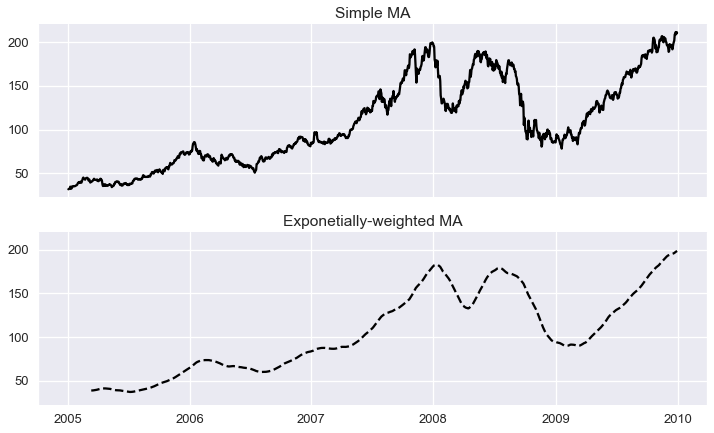

In [69]:
# 이동 평균법 ( 단순이동평균과 지수이동평균 ) - 의사결정이 지연
# 지수이동평균은 최근값이 가중치를 많이 주기 때문에 실제 그래프하고 일치하는 면이 많다.
# 지수이동평균 - 의사결정에 유리
import pandas as DatetimeIndexResampler
import matplotlib.pyplot as plt
frame = pd.DataFrame(np.random.randn(2,4), index=pd.date_range('1/1/2014', 
                         periods = 2, freq = 'W-WED'),
                    columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

close_px_all = pd.read_csv('stock_px.csv', parse_dates = True, index_col = 0)
print(close_px_all.head())
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
# B : 주말이 아닌 평일로
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True,
                        figsize = (12, 7))
appl_px = close_px.AAPL['2005':'2009']
# 60일 이동평균
ma60 = appl_px.rolling(60, min_periods = 50).mean() # 단순이동평균 : rolling
ewma60 = appl_px.ewm(span=60) # 지수이동평균 ( exponential weighted moving )
appl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponetially-weighted MA')
plt.show()

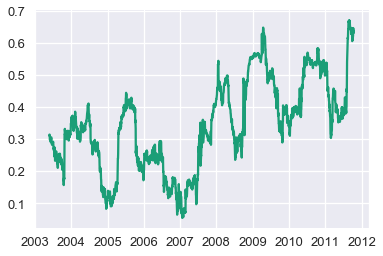

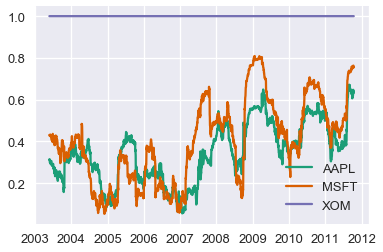

In [70]:
spx_px = close_px_all['XOM']
spx_rets = spx_px/spx_px.shift(1) - 1 # 변화율
returns = close_px.pct_change() # percent change 함수
# 상관계수
corr=returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
corr=returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

In [71]:
import pandas as pd
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0] 

In [72]:
# pandas - datareader
# pip install -U finance-datareader
import FinanceDataReader as fdr
fdr.__version__

'0.5.0'

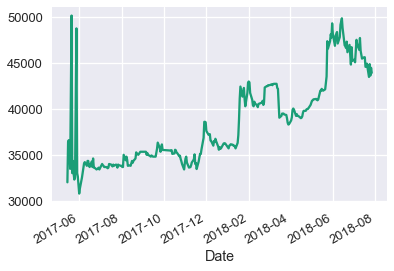

In [73]:
df = fdr.DataReader('267290', '2017')
df.head(10)
df['Close'].plot()

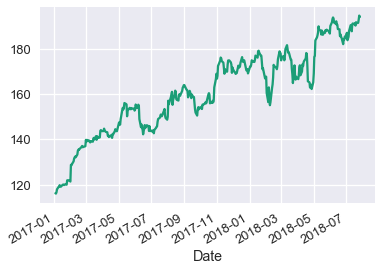

In [74]:
df = fdr.DataReader('AAPL', '2017-01-01')
df.head(10)
df['Close'].plot()

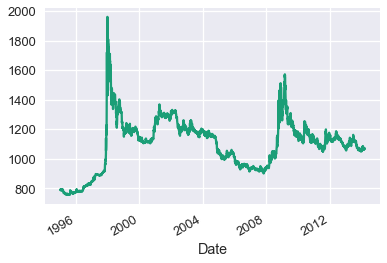

In [75]:
# 원달러 환율
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

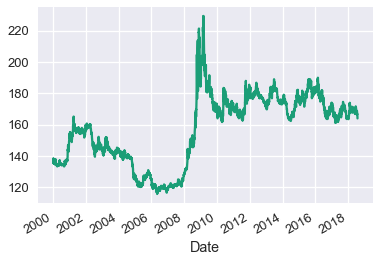

In [76]:
# 위안화 환율
df = fdr.DataReader('CNY/KRW', '1995')
df['Close'].plot()

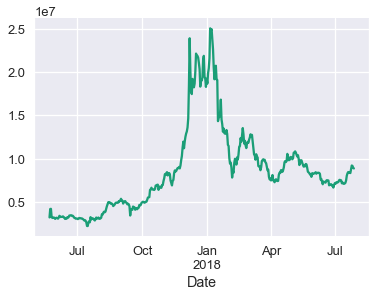

In [88]:
# 빗썸원화가격
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()

In [117]:
# 애플과 삼성전자
df = pdr.DataReader(['AAPL', 'XKRX:005930', 'morningstar',
                    '2017-01-01', '2017-12-30'])
df.head()

# 애플과 삼성전자
pd.core.common.is_list_like = pd.api.types.is_list_like # 원인 규명 필요 ㅎㅎ
import pandas_datareader as pdr
df = pdr.DataReader(['AAPL', "XKRX:005930"], "morningstar", "2017-01-01", "2017-12-30")
df.head()

Close      High     Low    Open    Volume
Symbol Date                                                  
AAPL   2017-01-02  115.82  115.8200  115.82  115.82         0
       2017-01-03  116.15  116.3300  114.76  115.80  28781865
       2017-01-04  116.02  116.5100  115.75  115.85  21118116
       2017-01-05  116.61  116.8642  115.81  115.92  22193587
       2017-01-06  117.91  118.1600  116.47  116.78  31751900

In [79]:
df.unstack(level=0).head()

       Date      
Close  2017-05-23    3206000.0
       2017-05-24    4175000.0
       2017-05-25    4199000.0
       2017-05-26    3227000.0
       2017-05-27    3152000.0
dtype: float64

In [121]:
# 애플과 삼성전자
# pip install pandas-datareader
# pip install git+https://github.com/pydata/pandas-datareader.git

# pd.core.common.is_list_like
import pandas_datareader as pdr
df = pdr.DataReader(['AAPL', 'XKRX:005930'], 'morningstar', '2017-01-01', '2017-12-30')
df.head()

Close      High     Low    Open    Volume
Symbol Date                                                  
AAPL   2017-01-02  115.82  115.8200  115.82  115.82         0
       2017-01-03  116.15  116.3300  114.76  115.80  28781865
       2017-01-04  116.02  116.5100  115.75  115.85  21118116
       2017-01-05  116.61  116.8642  115.81  115.92  22193587
       2017-01-06  117.91  118.1600  116.47  116.78  31751900

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8BB8D0>],
      dtype=object)

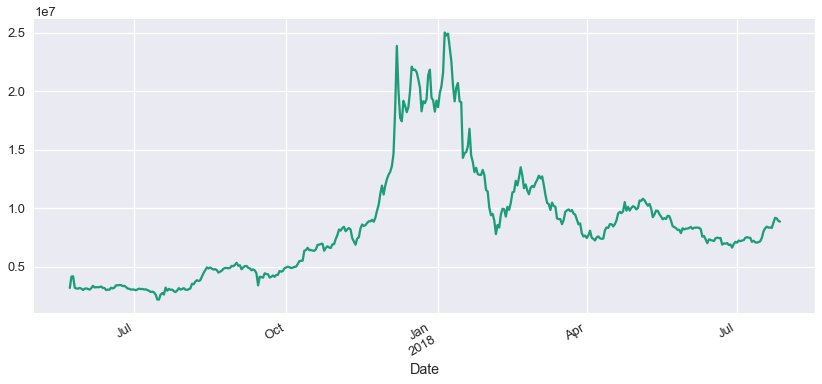

In [81]:
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.grid"] = True
df.unstack(level=0)['Close'].plot(subplots=True)

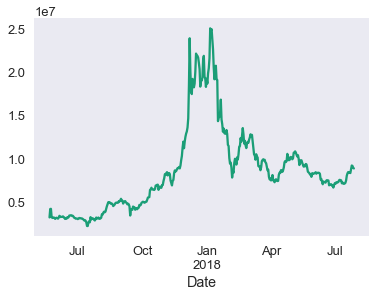

In [89]:
df.unstack(level=0)['Close'].plot(secondary_y = 'AAPL')

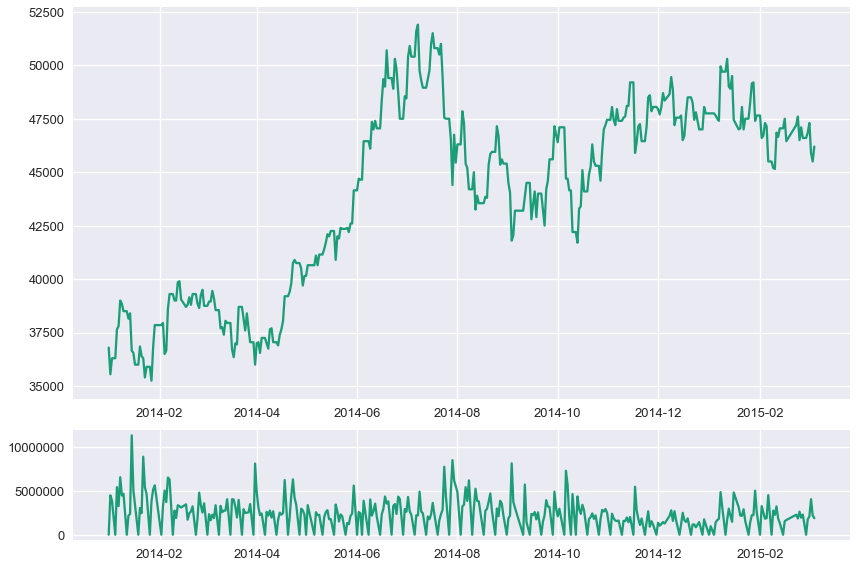

In [91]:
# 거래량과 주가의 비교
import matplotlib.pyplot as plt
hynix = fdr.DataReader('000660', '2014-01-01', "2015-03-06")
hynix.head(10)
fig = plt.figure(figsize=(12,8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)

bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)


top_axes.plot(hynix.index, hynix['Close'], label='Adjusted Close')
bottom_axes.plot(hynix.index, hynix['Volume'])

plt.tight_layout()
plt.show()

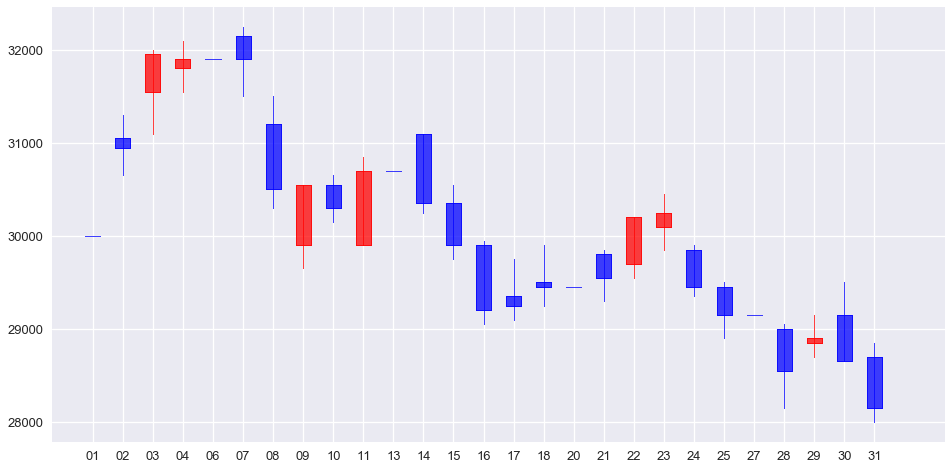

In [92]:
# 봉챠트
# pip install mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import matplotlib.ticker as ticker
import mpl_finance as matfin

start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2016, 3, 31)
hynix = fdr.DataReader('000660', start, end)
hynix.head(10)

fig = plt.figure(figsize=(16 ,8))
ax = fig.add_subplot(111)

day_list = range(len(hynix))
name_list = []
for day in hynix.index:
    name_list.append(day.strftime('%d'))
    
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

matfin.candlestick2_ohlc(ax, hynix['Open'], hynix['High'], hynix['Low'],
                        hynix['Close'], width = 0.5, colorup='r', colordown='b')

plt.show()


In [ ]:
import FinanceDataReader as fdr
import pandas as pd
tiker_list = ['AAPL', 'MSFT', 'AMZN']
df_list = [fdr.DataReader(ticker, '2010-01-01', '2016-12-31')['Close']
          for ticker in tiker_list]
panel_data = pd.concat(df_list, axis = 1)
panel_data.columns = ['AAPL', 'MSFT', 'AMZN']
panel_data = panel_data.dropna()
panel_data.head(10)
close=panel_data
close.head(10)

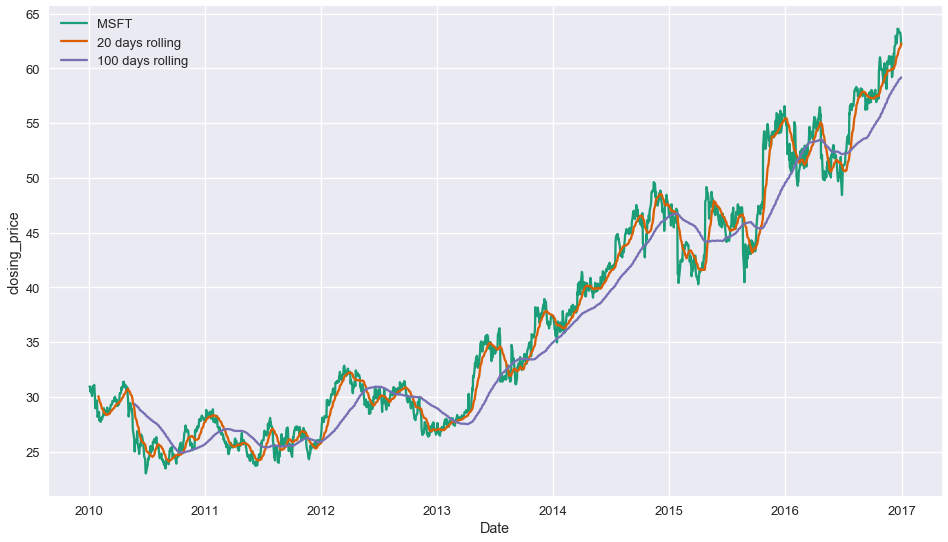

In [85]:
# 
msft = close.loc[:, 'MSFT']
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

fig, ax = plt.subplots(figsize = (16, 9))

ax.plot(msft.index, msft, label = 'MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label = '20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label = '100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('closing_price')
ax.legend()


In [93]:
# matplotlib => matplotlib, pandas, seaborn 3가지 출력 방법
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [94]:
data = pd.read_csv('stock_px.csv', parse_dates=True, index_col = 0)
data.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [95]:
short_rolling = data.rolling(window=20).mean()
short_rolling.head(25)

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN,NaN


In [96]:
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,365.9714,25.4844,76.8438,1242.5304
2011-10-11,366.5690,25.5088,76.7886,1241.0498
2011-10-12,367.2387,25.5350,76.7499,1239.7896
2011-10-13,367.9790,25.5666,76.7122,1238.6525
2011-10-14,368.8771,25.5993,76.6857,1237.7355


In [97]:
returns = data.pct_change(1)  # 변화율
returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


In [98]:
import numpy as np
log_returns = np.log(data).diff() # 정규화
log_returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006734,0.001420,0.000684,-0.000484
2003-01-06,0.000000,0.017816,0.024326,0.022226
2003-01-07,-0.002688,0.018873,-0.034293,-0.006566
2003-01-08,-0.020395,-0.028679,-0.004154,-0.014186


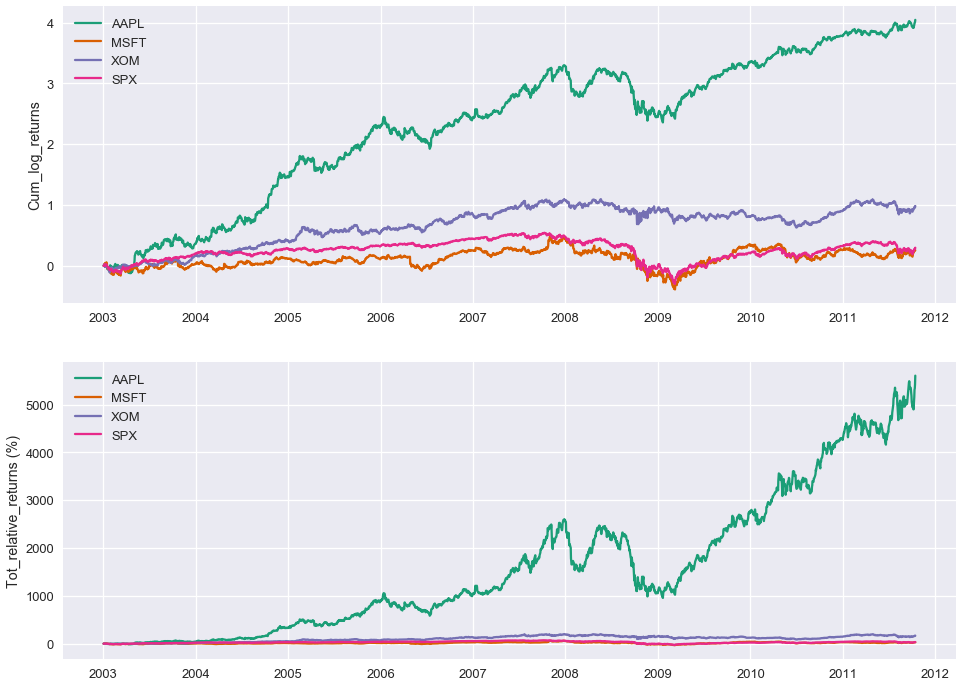

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))
ax1.set_ylabel('Cum_log_returns')
ax1.legend(loc='best')
for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1),
             label=str(c))
ax2.set_ylabel('Tot_relative_returns (%)')
ax2.legend(loc='best')
plt.show()

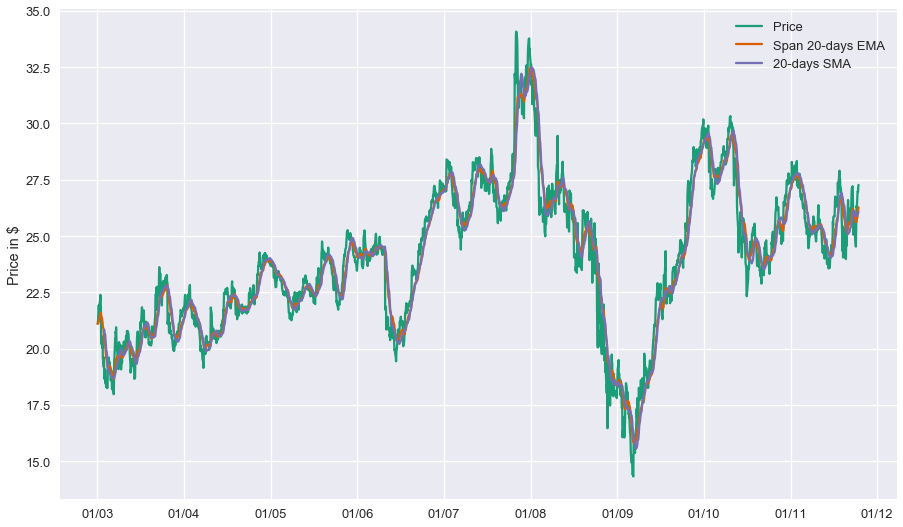

In [99]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
start_date = '2003-01-02'
end_date = '2011-10-14'

ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[
    start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[
    start_date:end_date, 'MSFT'], label = '20-days SMA')
ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)


In [101]:
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,2.761032,1.075701,3.156261,33.142519
2011-10-11,12.884743,1.027539,2.846617,30.574184
2011-10-12,13.376672,0.893487,3.380749,38.257119
2011-10-13,17.748418,1.007441,2.344011,31.365488
2011-10-14,28.335711,0.992923,3.695057,47.305918


In [102]:
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,0.333333,0.333333,0.333333,0.333333
2011-10-11,0.333333,0.333333,0.333333,0.333333
2011-10-12,0.333333,0.333333,0.333333,0.333333
2011-10-13,0.333333,0.333333,0.333333,0.333333
2011-10-14,0.333333,0.333333,0.333333,0.333333


In [107]:
trading_positions_final = trading_positions.shift(1)
trading_positions_final

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.000000,0.000000,0.000000,0.000000
2003-01-06,0.333333,0.333333,0.333333,-0.333333
2003-01-07,0.333333,0.333333,0.333333,0.333333
2003-01-08,0.333333,0.333333,-0.333333,0.333333
2003-01-09,-0.333333,0.333333,-0.333333,-0.333333
2003-01-10,-0.333333,0.333333,0.333333,0.333333
2003-01-13,-0.333333,0.333333,-0.333333,0.333333
2003-01-14,-0.333333,0.333333,-0.333333,0.333333
2003-01-15,-0.333333,0.333333,-0.333333,0.333333


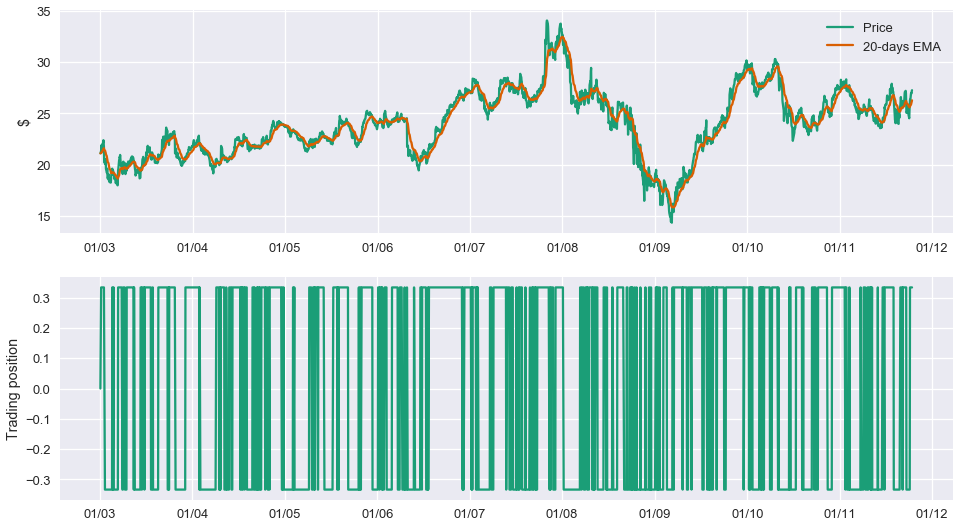

In [106]:
# 지수이동평균선에서 매매시점
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[
    start_date:end_date, 'MSFT'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[
    start_date:end_date, 'MSFT'], label= '20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index,
         trading_positions_final.loc[start_date:end_date, 'MSFT'],
         label = 'Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)       

In [108]:
# time series forecasting
# conda install -c conda-forge fbprophet

In [109]:
# ARIMA model : R에서는 auto.arima (AR, 차분, MA) 값을 자동으로 구해줌
# ARIMA facebook에서 prophet 모델을 생성

# prophet 비선형예측기이고 계절성을 고려, 일별주기성을 띈 데이터에 강점을 가진다.

In [115]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from fbprophet import Prophet